<a href="https://colab.research.google.com/github/anandsr724/ml_projects/blob/main/CIFAR10_classificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D, Dropout , BatchNormalization  , Flatten
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras import datasets
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

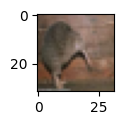

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[-44])

array([0], dtype=uint8)

In [ ]:
# encodeing
import keras
y_train_enc = keras.utils.to_categorical(y_train , 10)
y_test_enc  = keras.utils.to_categorical(y_test  , 10)

# since we are doing classification

In [ ]:
y_train_enc.shape

(50000, 10)

In [ ]:
# normalization

x_train = x_train /255
x_test = x_test /255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(64 ,kernel_size=(3,3), padding = 'valid' , activation = 'relu', input_shape=(32,32,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Conv2D(64 ,kernel_size=(3,3), padding = 'valid' , activation = 'relu', input_shape=(32,32,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation ='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
history = model.fit( x_train , y_train_enc , validation_split=0.2 , epochs = 5 )

Epoch 1/5
1250/1250 [==============================] - 142s 114ms/step - loss: 0.6704 - accuracy: 0.7741 - val_loss: 0.9926 - val_accuracy: 0.6929
Epoch 2/5
1250/1250 [==============================] - 136s 109ms/step - loss: 0.6366 - accuracy: 0.7864 - val_loss: 0.9446 - val_accuracy: 0.6996
Epoch 3/5
1250/1250 [==============================] - 136s 109ms/step - loss: 0.6142 - accuracy: 0.7952 - val_loss: 0.9707 - val_accuracy: 0.7012
Epoch 4/5
1250/1250 [==============================] - 138s 110ms/step - loss: 0.5945 - accuracy: 0.8021 - val_loss: 0.9198 - val_accuracy: 0.7121
Epoch 5/5
1250/1250 [==============================] - 141s 113ms/step - loss: 0.5723 - accuracy: 0.8100 - val_loss: 0.9620 - val_accuracy: 0.7057


In [ ]:
y_train_enc.shape

(50000, 10)

In [ ]:
y_train_enc[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity